# Systems Analysis & Design
## Final Project
### Elise, Mohsin & Nicolas

This project is aimed to predict wether a person is susceptible to get a stroke based on a few input variables.

In [9]:
# importing the dependencies:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading and preprocessing the data:

In [11]:
# importing the data set:
data = pd.read_csv('https://raw.githubusercontent.com/momokamalz/Systems-Analysis-and-Design-Stroke-Prediction/main/healthcare-dataset-stroke-data.csv')

In [12]:
# printing the first five rows of the data:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


A quick look at the data reveals that we have a few missing values in the bmi column so lets go ahead and explore how many missing values we have in total.

In [13]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

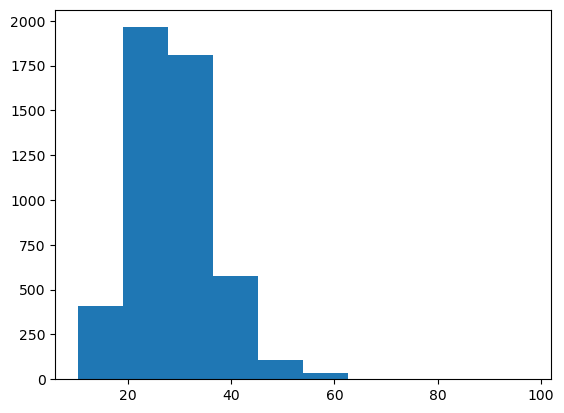

In [14]:
plt.hist(data['bmi'])
plt.show()

In [15]:
data.bmi.mean()

28.893236911794673

In [8]:
data.bmi.median()

28.1